In [1]:
df = spark.read.format('json').load("hdfs://orion11:33001/reddit/sampled_reddit/*")
print(df.count())


309199315


In [13]:
from pyspark.sql.functions import year, month, dayofmonth, from_unixtime, desc
from pyspark.sql.types import TimestampType, DateType
botExpr = "[bB][oO][tT]"
df2 = (df
        .filter(~(df.body.like("[deleted]") | df.author.rlike(botExpr))))
print(df2.count())




288673969


In [25]:
import sys
print(sys.path)
path = '/home4/vramaneti/.local/lib/python3.7/site-packages'
sys.path.insert(0,path)

from pyspark.sql.types import DoubleType
from pyspark.sql.functions import udf, col
import textstat 

def gun_fog_index(comment):
    return textstat.gunning_fog(comment)

def flesch_reading_ease(comment):
    return textstat.flesch_reading_ease(comment)

gun_fog_index_udf = udf(gun_fog_index, DoubleType())
df3 = df2.withColumn('gun_fog_index', gun_fog_index_udf(col('body')))
df3.show()


flesch_reading_ease_udf = udf(flesch_reading_ease, DoubleType())
df4 = df3.withColumn('flesch_reading_ease', flesch_reading_ease_udf(col('body')))



['/home4/vramaneti/.local/lib/python3.7/site-packages', '/home4/vramaneti/.local/lib/python3.7/site-packages', '/home4/vramaneti/.local/lib/python3.7/site-packages', '/home4/vramaneti/.local/lib/python3.7/site-packages', '/home4/vramaneti/.local/lib/python3.7/site-packages', '/tmp/spark-809e4e56-1327-42a4-be3f-1a4e6ac39ca9/userFiles-3aad3434-b391-41ca-af37-797f9873dbde', '/home4/vramaneti/project3', '/usr/local/spark-2.4.4-bin-hadoop2.7/python/lib/py4j-0.10.7-src.zip', '/usr/local/spark-2.4.4-bin-hadoop2.7/python', '/home4/vramaneti/project3', '/home2/anaconda3/lib/python37.zip', '/home2/anaconda3/lib/python3.7', '/home2/anaconda3/lib/python3.7/lib-dynload', '', '/home2/anaconda3/lib/python3.7/site-packages', '/home2/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home4/vramaneti/.ipython']
+--------+----------------+--------------+----------------------+-----------------+--------------------+---------+----------------+-------+-----------+-------------+-----+------+------+

+--------+----------+--------------+----------------------+-----------------+--------------------+---------+----------------+-------+-----------+-------------+-----+------+------+-------+--------+-----------+----------+---------+--------------+-------+------------+-----+-----+------------+--------+---------+------------+---+------------+-------------+-------------------+
|archived|    author|author_cakeday|author_flair_css_class|author_flair_text|                body|body_html|controversiality|created|created_utc|distinguished|downs|edited|gilded|     id| link_id|mod_reports|      name|parent_id|removal_reason|replies|retrieved_on|saved|score|score_hidden|stickied|subreddit|subreddit_id|ups|user_reports|gun_fog_index|flesch_reading_ease|
+--------+----------+--------------+----------------------+-----------------+--------------------+---------+----------------+-------+-----------+-------------+-----+------+------+-------+--------+-----------+----------+---------+--------------+-------+

In [48]:
import pyspark.sql.functions as sf
df6 = df4.select("id", "subreddit", "gun_fog_index", "flesch_reading_ease").filter(df4.subreddit=="google")
df6.show()

+-------+---------+-------------+-------------------+
|     id|subreddit|gun_fog_index|flesch_reading_ease|
+-------+---------+-------------+-------------------+
|c22x4ey|   google|          2.0|             117.16|
|c22x6in|   google|          0.8|             120.21|
|c22x7ve|   google|         8.72|               84.0|
|c22x91e|   google|          2.2|              82.81|
|c22xapw|   google|          0.8|             120.21|
|c22xb6v|   google|          3.6|              96.18|
|c22xbap|   google|          3.2|             105.66|
|c22xbda|   google|          3.2|             105.66|
|c22xbvz|   google|         7.08|              84.37|
|c22xffu|   google|          2.4|             116.15|
|c22xghu|   google|         10.3|              75.54|
|c22xk4w|   google|          0.8|             120.21|
|c22xmhg|   google|         8.13|              84.68|
|c22xudv|   google|          0.8|             120.21|
|c22xy76|   google|         9.03|               84.0|
|c22y7q4|   google|         

In [49]:
import matplotlib.pyplot as plt
pdf = df6.toPandas()

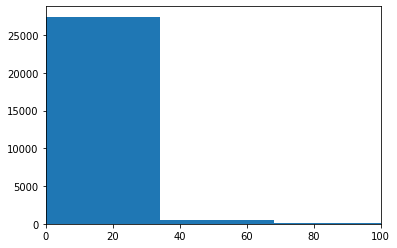

In [73]:
plt.hist(pdf.gun_fog_index, bins=20)
plt.xlim(0, 100)
plt.show()


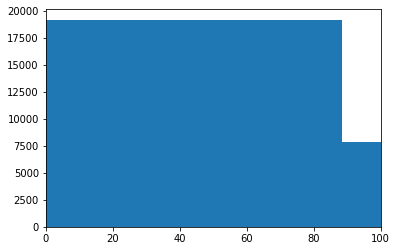

In [74]:
plt.hist(pdf.flesch_reading_ease, bins=20)
plt.xlim(0, 100)
plt.show()

In [82]:
import pyspark.sql.functions as sf
df7 = df4.select("id", "subreddit", "gun_fog_index", "flesch_reading_ease").filter(df4.subreddit=="apple")

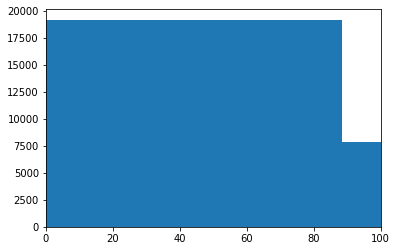

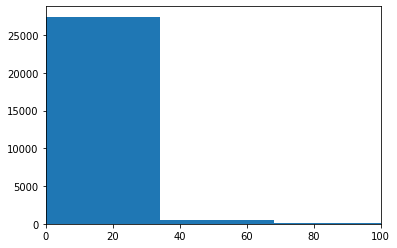

In [81]:
pdf = df7.toPandas()
plt.hist(pdf.flesch_reading_ease, bins=20)
plt.xlim(0, 100)
plt.show()

plt.hist(pdf.gun_fog_index, bins=20)
plt.xlim(0, 100)
plt.show()